<h1>Dawood Sarfraz </h1>
<h1> Duplicate Questions using RandomForestClassifier and XGBoostClassifier </h1>

# Dataset Description
The ground truth is the set of labels that have been supplied by human experts. The ground truth labels are inherently subjective, as the true meaning of sentences can never be known with certainty. Human labeling is also a 'noisy' process, and reasonable people will disagree. As a result, the ground truth labels on this dataset should be taken to be 'informed' but not 100% accurate, and may include incorrect labeling. We believe the labels, on the whole, to represent a reasonable consensus, but this may often not be true on a case by case basis for individual items in the dataset.

<b>Please note:</b> 
All of the questions in the training set are genuine examples from Quora.

# Data fields
<b>* id - </b> the id of a training set question pair </br>
<b>* qid1, qid2 - </b>- unique ids of each question (only available in train.csv) </br>
<b>* question1, question2 - </b>- the full text of each question </br>
<b>* is_duplicate - </b> the target variable, set to 1 if question1 and question2 have essentially the same meaning, and 0 otherwise.</br>

<h1> Without Feature Engineering </h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df.shape

(404290, 6)

In [5]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [6]:
df.tail(10)

,id,qid1,qid2,question1,question2,is_duplicate
404280,404280,537922,537923,What are some outfit ideas to wear to a frat p...,What are some outfit ideas wear to a frat them...,1
404281,404281,99131,81495,Why is Manaphy childish in Pokémon Ranger and ...,Why is Manaphy annoying in Pokemon ranger and ...,1
404282,404282,1931,16773,How does a long distance relationship work?,How are long distance relationships maintained?,1
404283,404283,537924,537925,What do you think of the removal of the MagSaf...,What will the CPU upgrade to the 2016 Apple Ma...,0
404284,404284,537926,537927,What does Jainism say about homosexuality?,What does Jainism say about Gays and Homosexua...,1
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0
404289,404289,537932,537933,What is like to have sex with cousin?,What is it like to have sex with your cousin?,0


In [7]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
200467,200467,302231,302232,What are some movies bearing best names/titles?,What is the best name for a movie?,0
333464,333464,460536,460537,Can I not apply for gre 2016 without passport?,What are the four fundamental forces in physic...,0
292283,292283,413851,385953,"On OkCupid, in the messages it says this user ...",I don't want my ex to see that I re-activated ...,0
222609,222609,330212,330213,What are the standard markings for classified ...,What marking elements are required for classif...,0
316999,316999,265052,442123,"I want to be a billionaire, how do I accomplis...",I want to become a billionaire through creatin...,1
221858,221858,73296,329295,What are the secrets behind the Gold Rush TV s...,How many camera men are killed annually filmin...,0
209123,209123,313317,313318,What type business is we should to be start?,What type of business should I start?,1
229696,229696,339069,339070,Would you be angry if your teenage son had sex...,How do I show compassion to my teenage son?,0
103113,103113,170504,170505,"What is better for retirement, Miami or Marbel...",Is blinking controlled by the medulla oblongata?,0
107591,107591,176972,176973,Are Armenians generally considered white or Eu...,Which Europeans are not considered white?,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [10]:
df = df.dropna()

In [11]:
df.shape

(404287, 6)

In [12]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
print(df["is_duplicate"].value_counts())
print((df["is_duplicate"].value_counts()/df["is_duplicate"].count())*100)

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

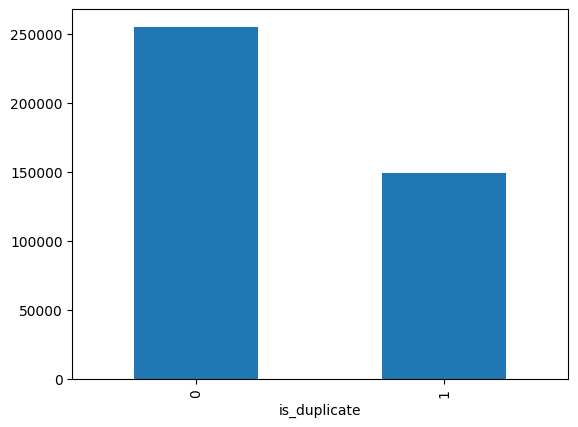

In [15]:
df["is_duplicate"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

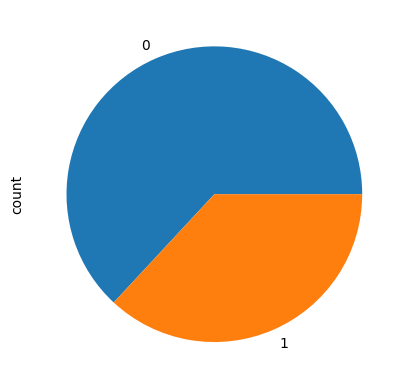

In [16]:
df["is_duplicate"].value_counts().plot(kind="pie")

In [17]:
qid = pd.Series(df["qid1"].tolist() + df["qid2"].tolist())
print("# of Unique Questions",np.unique(qid).shape[0])

# of Unique Questions 537929


In [18]:
x = qid.value_counts()>1
print("# of Questions Qepeated",x[x].shape[0])

# of Questions Qepeated 111778


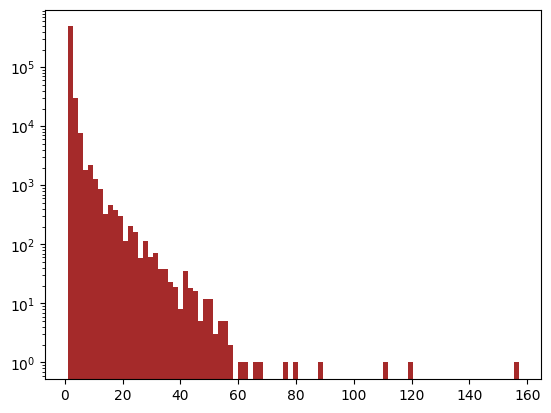

In [19]:
plt.hist(qid.value_counts().values,bins=90,color="brown")
plt.yscale("log")
plt.show()

In [20]:
new_df = df

In [21]:
new_df.shape

(404287, 6)

In [22]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [23]:
new_df = new_df.dropna()

## Im using just 20000 rows to reduce time and computation consumption bcz to load whole data need 18GB+ Memory required
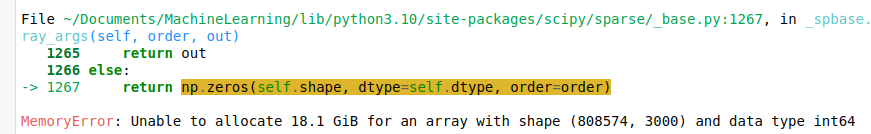

In [24]:
new_df = df.sample(20000) 

In [25]:
new_df.shape

(20000, 6)

In [26]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [27]:
new_df.duplicated().sum()

0

In [28]:
new_df.shape

(20000, 6)

In [29]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
34117,"What is the Sahara, and how do the average tem...","What is the Sahara, and how do the average tem..."
88707,What is muscle memory?,Does muscle memory exist?
369992,"If a woman rapes a man, then she gets pregnant...","If a woman rapes a man and gets pregnant, what..."
242119,What is a vector file?,What is a vector?
240859,What is the melting point of crustal rocks?,What is the melting point of rocks?


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts of questions asked
questions = list(ques_df['question1']) + list(ques_df['question2'])

# if You have Good laptop increase No. of max_features
cv = CountVectorizer(max_features=3000)#creating 3000 here for Question1 7 3000 for Question2 in end would double
q1_array, q2_array = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [31]:
temp_data1 = pd.DataFrame(q1_array, index= ques_df.index) # here q1_array back to data frame
temp_data2 = pd.DataFrame(q2_array, index= ques_df.index) # here q2_array back to data frame
temp_data = pd.concat([temp_data1, temp_data2], axis=1) # concating data frames here to make sigle data frame
temp_data.shape 

(20000, 6000)

In [32]:
temp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
34117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
temp_data['is_duplicate'] = new_df['is_duplicate']

In [34]:
temp_data.shape

(20000, 6001)

In [35]:
temp_data.head(10)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
34117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
88707,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
369992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
242119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
86587,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115238,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
289549,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
20960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
temp_data.sample(10)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
13516,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
263769,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
67244,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,1
94819,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
67979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49799,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
59671,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
206951,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
236875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
temp_data.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
200778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
258720,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
294027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242937,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
287891,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
144533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
335973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_data.iloc[:,0:-1].values, temp_data.iloc[:,-1],
                                                    test_size=0.2,random_state= 42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy of Random Forest",accuracy_score(y_test,y_pred) * 100)

Accuracy of Random Forest 73.3


In [40]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
rf = XGBClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy of Random Forest",accuracy_score(y_test,y_pred) * 100)

Accuracy of Random Forest 72.82499999999999
